In [1]:
import numpy as np
import pandas as pd
import copy

In [2]:
train_df = pd.read_excel("训练.xlsx")
test1_df = pd.read_excel("测试A.xlsx")
test2_df = pd.read_excel("测试B.xlsx")

In [176]:
train_df.head()

,ID,TOOL_ID,210X1,210X2,210X3,210X4,210X5,210X6,210X7,210X8,...,750X1444,750X1445,750X1446,750X1447,750X1448,750X1449,750X1450,750X1451,750X1452,Y
0,ID001,N,102.05,0.465,0.27,1.430,67.45,4.620,-0.54,-1.05,...,0.00072,0.00072,25.7,0.00072,0.00072,25.7,0.00072,0.00072,2.400000e+12,2.945079
1,ID002,M,100.95,0.805,0.22,3.477,62.08,3.412,-2.12,1.02,...,0.00072,0.00072,25.5,0.00072,0.00072,25.5,0.00072,0.00072,2.400000e+12,2.955092
2,ID003,L,98.56,0.555,0.24,1.172,56.70,3.080,-2.25,0.88,...,0.00064,0.00064,25.2,0.00064,0.00064,25.2,0.00064,0.00064,2.400000e+12,2.741264
3,ID004,M,100.35,0.901,0.22,3.631,62.25,3.949,-1.98,0.82,...,0.00072,0.00072,26.4,0.00072,0.00072,26.4,0.00072,0.00072,2.400000e+12,2.799336
4,ID005,M,100.25,0.854,0.23,3.429,61.42,3.630,-1.89,1.02,...,0.00072,0.00072,26.4,0.00072,0.00072,26.4,0.00072,0.00072,2.400000e+12,2.692093


In [177]:
train_df.describe()

,210X1,210X2,210X3,210X4,210X5,210X6,210X7,210X8,210X9,210X10,...,750X1444,750X1445,750X1446,750X1447,750X1448,750X1449,750X1450,750X1451,750X1452,Y
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,4.860000e+02,500.000000
mean,92.272420,0.511932,0.232420,1.626228,57.126160,3.424444,-0.428580,0.267060,-0.027540,25.854000,...,0.000694,0.000694,26.010700,0.000694,0.000694,26.010700,0.000694,0.000694,2.400000e+12,2.846187
std,27.471434,0.233265,0.104536,1.090267,18.224157,1.148460,1.188766,1.092823,0.120268,1.908069,...,0.000045,0.000045,0.349445,0.000045,0.000045,0.349445,0.000045,0.000045,0.000000e+00,0.200970
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.450000,-1.920000,-0.220000,0.000000,...,0.000540,0.000540,24.900000,0.000540,0.000540,24.900000,0.000540,0.000540,2.400000e+12,2.326846
25%,100.100000,0.365750,0.210000,1.019750,56.575000,3.242000,-1.912500,-0.670000,-0.140000,24.400000,...,0.000670,0.000670,25.800000,0.000670,0.000670,25.800000,0.000670,0.000670,2.400000e+12,2.705686
50%,101.300000,0.506000,0.240000,1.293000,62.130000,3.616000,-0.185000,0.400000,-0.015000,26.000000,...,0.000690,0.000690,26.000000,0.000690,0.000690,26.000000,0.000690,0.000690,2.400000e+12,2.840442
75%,101.750000,0.612250,0.270000,1.925750,67.250000,3.864250,0.285000,1.220000,0.080000,27.000000,...,0.000730,0.000730,26.300000,0.000730,0.000730,26.300000,0.000730,0.000730,2.400000e+12,2.980399
max,102.800000,0.970000,0.410000,3.891000,71.980000,5.173000,2.190000,2.230000,0.170000,29.400000,...,0.000880,0.000880,27.100000,0.000880,0.000880,27.100000,0.000880,0.000880,2.400000e+12,3.454556


In [3]:
new_column = test1_df.columns

In [4]:
train_y = train_df[train_df.columns[-1]]
train_y.shape

(500,)

In [5]:
df_X = pd.concat([train_df[new_column], test1_df, test2_df], axis=0)
df_X.shape

(721, 8028)

In [181]:
df_X.describe()

,210X1,210X2,210X3,210X4,210X5,210X6,210X7,210X8,210X9,210X10,...,750X1443,750X1444,750X1445,750X1446,750X1447,750X1448,750X1449,750X1450,750X1451,750X1452
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,...,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,6.920000e+02
mean,94.611526,0.523080,0.227642,1.594352,57.586699,3.404370,-0.370111,0.313329,-0.023745,25.810264,...,0.000701,0.000701,0.000701,26.006936,0.000701,0.000701,26.006936,0.000701,0.000701,2.400000e+12
std,23.489545,0.205473,0.095255,0.967703,15.486586,1.023373,1.134512,1.063373,0.114661,1.818792,...,0.000052,0.000052,0.000052,0.354477,0.000052,0.000052,0.354477,0.000052,0.000052,0.000000e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.590000,-1.920000,-0.220000,0.000000,...,0.000530,0.000530,0.000530,24.900000,0.000530,0.000530,24.900000,0.000530,0.000530,2.400000e+12
25%,100.100000,0.426000,0.210000,1.060000,56.470000,3.095000,-0.930000,-0.610000,-0.130000,24.400000,...,0.000670,0.000670,0.000670,25.800000,0.000670,0.000670,25.800000,0.000670,0.000670,2.400000e+12
50%,101.050000,0.514000,0.240000,1.341000,61.220000,3.536000,-0.150000,0.390000,-0.010000,26.000000,...,0.000700,0.000700,0.000700,26.000000,0.000700,0.000700,26.000000,0.000700,0.000700,2.400000e+12
75%,101.850000,0.594000,0.260000,1.752000,63.610000,3.772000,0.300000,1.280000,0.070000,26.900000,...,0.000740,0.000740,0.000740,26.300000,0.000740,0.000740,26.300000,0.000740,0.000740,2.400000e+12
max,102.800000,0.970000,0.410000,3.891000,71.980000,5.236000,2.280000,2.230000,0.170000,29.400000,...,0.000880,0.000880,0.000880,27.100000,0.000880,0.000880,27.100000,0.000880,0.000880,2.400000e+12


In [6]:
train_count = df_X.count()
name_col = df_X.columns
less_than = 400
num_less = 0
not_full = 0
delete_columns = []
for i in range(len(train_count)):
    c = train_count[i]
    if c < less_than:
        num_less += 1
        delete_columns.append(name_col[i])
    if c >= less_than and c<500:
        not_full += 1
    data = df_X[name_col[i]][df_X[name_col[i]].notnull()]
    items = len(set(data))
    
print(num_less, not_full, len(delete_columns))
print(np.sort(list(set(train_count))))

199 0 199
[  0 315 355 373 581 649 650 659 670 678 684 685 686 687 689 691 692 693
 694 697 700 702 703 706 713 714 715 716 717 718 719 720 721]


In [7]:
df_X.columns

Index(['ID', 'TOOL_ID', '210X1', '210X2', '210X3', '210X4', '210X5', '210X6',
       '210X7', '210X8',
       ...
       '750X1443', '750X1444', '750X1445', '750X1446', '750X1447', '750X1448',
       '750X1449', '750X1450', '750X1451', '750X1452'],
      dtype='object', length=8028)

In [184]:
for i in delete_columns:
    print(set(train_df[i][train_df[i].notnull()]))

set()
set()
{8.0, 9.0}
{8.0, 9.0}
{100.0}
{100.0}
{100.0}
{100.0}
{100.0}
{100.0}
{100.0}
{100.0}
{100.0}
{100.0}
{224.0, 225.0, 226.0, 227.0, 228.0, 229.0, 230.0, 231.0, 232.0, 233.0, 234.0, 235.0, 223.0}
{227.0, 228.0, 229.0, 230.0, 231.0, 232.0, 233.0, 234.0, 235.0, 236.0, 237.0, 238.0, 239.0}
{224.0, 225.0, 226.0, 227.0, 228.0, 215.0, 216.0, 217.0, 218.0, 219.0, 220.0, 221.0, 222.0, 223.0}
{0.0, 0.11, 0.20999999999999999, 0.20000000000000001, 0.17999999999999999, 0.10000000000000001, 0.19}
{0.0, 0.25, 0.23000000000000001, 0.20000000000000001, 0.13, 0.14999999999999999, 0.029999999999999999}
{0.0, 0.080000000000000002, 0.17999999999999999, 0.14999999999999999}
{0.0, 1.0, 3.0, 4.0, 5.0, 9.0}
{0.0, 10.0, 20.0}
{0.0}
{0.0}
{12.6, 13.0, 14.800000000000001, 15.300000000000001, 14.699999999999999, 17.600000000000001, 18.5, 19.699999999999999, 19.899999999999999, 19.0, 21.600000000000001, 18.699999999999999, 24.300000000000001, 25.600000000000001, 25.899999999999999, 24.600000000000001, 25

{0.0, 1.0, 2.0, 3.0, -22.0, 17.0, 18.0, -1.0, -2.0}
{0.0, 2.0, 4002.0, 4.0, 6.0, 1142.0, -2.0}
{0.0, -4000.0, 2.0, -10.0, -4.0, -2.0}
{0.0}
{2001.0, 1997.0, 1998.0, 1999.0}
{2002.0, 2005.0, 1998.0}
{1995.0, 1998.0}
{2000.0}
{0.0}
{0.0, 1.0}
{0.0}
{0.0}
{0.0}
{0.0, 1.0, 2.0, 3.0}
{0.0, -1.0}
{0.0}
{0.0, 1.0, -4.0, -3.0, -1.0}
{0.0, 2.0, 4.0, -4.0, -2.0}
{0.0, -4.0, -2.0}
{0.0}
{0.0, 1.0, -1.0, -5.0, -2.0}
{0.0, 2.0, 5.0, -5.0, -2.0}
{0.0, -7.0, -5.0, -2.0}
{0.0}
{0.0}
{0.0}
{0.0}
{0.0}
{0.0, 1.0}
{9.9000000000000004, 10.0}
{10.1, 10.0}
{9.9000000000000004, 9.8000000000000007}
{10.0}
{0.0}
{0.0}
{0.0}
{50.0, 29.0}
{50.0, 29.0}
{50.0, 29.0}
{0.0}
{0.0}
{0.0}
{0.0}
{64.0, 50.0}
{64.0, 50.0}
{64.0, 50.0}
{0.0}
{0.0}
{0.0}
{0.0}
{0.0}
{0.0}
{3000.0, 2999.0}
{3001.0, 3002.0, 3003.0}
{3000.0, 2998.0, 2999.0}
{38.0, 39.0, 42.0, 43.0, 44.0, 45.0}
{38.0, 39.0, 42.0, 43.0, 44.0, 45.0}
{38.0, 39.0, 42.0, 43.0, 44.0, 45.0}
{0.0}
{0.0}
{0.0}
{3000.0}
{51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0}
{

In [8]:
cids = {}
tools = []
for i in name_col[1:-1]:
    try:
        sn = i.split('X')
        n1 = sn[0]
        n2 = sn[1]
        if n1 not in cids:
            cids[n1] = []
        cids[n1].append(n2)
    except:
        print(i, set(df_X[i]), df_X[i].count())
        tools.append(i)
print(len(cids))
for c in cids:
    print(c, len(cids[c]))

TOOL_ID {'L', 'N', 'O', 'K', 'J', 'M'} 721
Tool {'A', 'B'} 721
TOOL_ID (#1) {'E', 'N'} 721
TOOL_ID (#2) {'E', 'C', 'D'} 721
TOOL_ID (#3) {'N0', 'E0'} 721
Tool (#1) {2823, 329, 206, 530, 1110, 215, 1113, 1018, 1245} 721
Tool (#2) {'A', 'B', 'C'} 721
tool {2409, 3009, 4106, 4147} 721
tool (#1) {'R', 'V', 'Q', 'U', 'P', 'T', 'S', 'W', 'X'} 721
TOOL {'B', 'C', 'D'} 721
TOOL (#1) {'YX1', 'XY1'} 721
Tool (#3) {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15} 721
TOOL (#2) {'A', 'B'} 721
16
210 230
220 519
300 21
310 170
311 221
261 535
312 679
330 1311
340 199
344 274
360 1452
400 183
420 173
440A 213
520 382
750 1451


In [9]:
# delete the columns that has too many null and tools. 
# for the tools_column, they shall be one_hot and drop out.
df_X.drop(delete_columns, axis=1, inplace=True)
print(df_X.shape)
count = 0
for i in tools:
    print(i)
    tmp = pd.get_dummies(df_X[i], prefix='tool_'+str(count))
    count += 1
    df_X = pd.concat([df_X, tmp], axis=1)
    print(df_X.shape)

(721, 7829)
TOOL_ID
(721, 7835)
Tool
(721, 7837)
TOOL_ID (#1)
(721, 7839)
TOOL_ID (#2)
(721, 7842)
TOOL_ID (#3)
(721, 7844)
Tool (#1)
(721, 7853)
Tool (#2)
(721, 7856)
tool
(721, 7860)
tool (#1)
(721, 7869)
TOOL
(721, 7872)
TOOL (#1)
(721, 7874)
Tool (#3)
(721, 7889)
TOOL (#2)
(721, 7891)


In [10]:
df_X.drop(tools, axis=1, inplace=True)
print(df_X.shape)

(721, 7878)


In [11]:
ID = df_X['ID']
df_X.drop(['ID'], axis=1, inplace=True)
df_X.shape

(721, 7877)

In [13]:
name_col = df_X.columns
notnull = df_X.count()
dt = df_X.dtypes
long_judge = 65
intidxs = []
longidxs = []
len_d = []
for i in range(len(dt)):
    t = dt[i]
    if t == 'int':
        dset = set(df_X[name_col[i]])
        #print(i, notnull[i], name_col[i], len(dset), dset)
        intidxs.append(i)
        len_d.append(len(dset))
        if len(dset) > long_judge:
            longidxs.append(i)
print(len(intidxs), len(longidxs))

1531 231


In [14]:
ldmap = {}
for i in len_d:
    if i not in ldmap:
        ldmap[i] = 0
    ldmap[i] += 1
ldk = ldmap.keys()
ldk = np.sort(list(ldk))
for i in ldk:
    print(i, ldmap[i])

1 607
2 124
3 64
4 63
5 29
6 24
7 16
8 14
9 17
10 17
11 9
12 10
13 9
14 15
15 12
16 14
17 4
18 1
19 5
20 5
21 6
22 9
23 10
24 17
25 2
26 35
27 1
30 3
32 2
33 4
34 1
35 2
36 2
37 1
38 4
39 3
40 3
41 1
42 1
43 3
44 7
45 3
46 3
47 2
48 5
49 1
50 3
51 3
52 4
53 10
54 2
55 2
56 1
57 8
58 9
59 2
60 20
61 11
62 2
63 6
64 20
65 7
67 2
68 3
69 2
70 2
71 3
74 2
76 1
78 1
80 3
81 1
82 2
83 2
84 1
85 3
88 1
90 1
91 2
92 1
93 1
94 1
96 1
100 3
101 2
103 2
105 1
108 1
110 1
114 1
116 1
118 1
120 1
123 3
125 1
129 1
131 1
134 1
135 2
136 2
140 1
155 1
156 1
157 1
164 1
165 1
166 1
168 1
170 2
172 1
174 1
178 1
182 1
191 1
210 1
211 1
228 1
246 1
256 1
258 1
259 2
260 1
261 1
301 1
369 1
417 1
447 1
463 1
472 1
483 1
491 1
514 1
523 1
536 3
537 1
538 1
541 2
543 5
546 2
547 3
548 1
551 5
553 4
554 1
556 2
557 2
558 2
559 1
560 3
561 2
572 2
573 3
683 1
708 1
711 3
715 3
716 1
717 4
719 4
720 65
721 8


In [15]:
min_ld = 721
for i in longidxs:
    t = dt[i]
    if t == 'int':
        dset = set(df_X[name_col[i]])
        #print(i, notnull[i], name_col[i], len(dset), dset)
        if len(dset)<min_ld:
            min_ld = len(dset)
print(min_ld)

67


In [16]:
tobeonehot = 0
max_ld = 0
for i in set(intidxs)-set(longidxs):
    t = dt[i]
    if t == 'int':
        dset = set(df_X[name_col[i]])
        print(i, notnull[i], name_col[i], len(dset), dset)
        if len(dset)>1:
            tobeonehot += 1
        if len(dset)>max_ld:
            max_ld = len(dset)
print(tobeonehot, max_ld)

16 721 210X17 1 {750}
18 721 210X19 3 {0, 1, 2}
20 721 210X21 2 {0, 14}
21 721 210X22 2 {0, 14}
30 721 210X31 1 {1}
35 721 210X36 9 {0, 450, 420, 425, 430, 435, 440, 445, 415}
36 721 210X37 2 {0, 1}
37 721 210X38 1 {0}
76 721 210X77 2 {96, 0}
77 721 210X78 2 {96, 0}
78 721 210X79 1 {0}
79 721 210X80 2 {0, 1}
102 721 210X103 1 {0}
195 721 210X196 1 {0}
196 721 210X197 1 {0}
197 721 210X198 1 {0}
198 721 210X199 2 {0, 1}
212 721 210X214 3 {0, 2, 3}
216 721 210X218 2 {0, 100}
219 721 210X221 2 {0, 50}
220 721 210X222 2 {0, 35}
221 721 210X223 2 {0, 50}
222 721 210X224 2 {0, 1}
225 721 210X227 1 {0}
230 721 220X1 1 {0}
232 721 220X3 26 {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26}
236 721 220X7 1 {4}
245 721 220X16 26 {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26}
246 721 220X17 1 {4}
253 721 220X24 1 {0}
273 721 220X57 1 {1}
274 721 220X58 1 {6}
275 721 220X60 26 {1, 2, 3, 4, 5, 6, 7, 8, 9, 

1372 721 261X442 40 {512, 514, 518, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 511}
1379 721 261X449 1 {51}
1382 721 261X452 47 {512, 513, 517, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511}
1389 721 261X459 1 {49}
1392 721 261X462 50 {512, 513, 516, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511}
1399 721 261X469 1 {49}
1400 721 261X470 53 {512, 513, 514, 515, 516, 517, 520, 532, 534, 535, 537, 538, 540, 548, 550, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490,

2062 721 312X542 1 {0}
2063 721 312X543 1 {0}
2064 721 312X546 1 {0}
2065 721 312X547 1 {0}
2066 721 312X548 1 {0}
2067 721 312X549 1 {0}
2070 721 312X554 55 {684, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 715, 717, 718, 719, 720, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743}
2078 721 312X566 51 {680, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 714, 715, 716, 717, 718, 719, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736}
2079 721 312X567 53 {384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 401, 281, 282, 283, 284, 288, 289, 290, 291, 292, 293, 294, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 381, 382, 383}
2080

3998 721 360X39 1 {0}
3999 721 360X40 1 {0}
4001 721 360X42 1 {0}
4002 721 360X43 1 {0}
4049 721 360X90 1 {0}
4050 721 360X91 1 {0}
4051 721 360X92 1 {0}
4053 721 360X94 1 {0}
4054 721 360X95 1 {0}
4056 721 360X97 1 {0}
4057 721 360X98 1 {0}
4069 721 360X110 1 {0}
4071 721 360X112 1 {0}
4650 721 360X691 24 {20170801, 20170802, 20170803, 20170804, 20170805, 20170806, 20170807, 20170808, 20170809, 20170810, 20170811, 20170812, 20170813, 20170814, 20170815, 20170816, 20170817, 20170818, 20170726, 20170727, 20170728, 20170729, 20170730, 20170731}
4651 721 360X692 1 {55}
4652 721 360X693 1 {55}
4654 721 360X695 1 {0}
4655 721 360X696 1 {0}
4657 721 360X698 1 {0}
4659 721 360X700 1 {0}
4669 721 360X710 24 {20170801, 20170802, 20170803, 20170804, 20170805, 20170806, 20170807, 20170808, 20170809, 20170810, 20170811, 20170812, 20170813, 20170814, 20170815, 20170816, 20170817, 20170818, 20170726, 20170727, 20170728, 20170729, 20170730, 20170731}
4670 721 360X711 24 {20170801, 20170802, 20170803,

In [12]:
def dict2list(dic):
    keys = dic.keys()
    vals = dic.values()
    lst = [(key, val) for key, val in zip(keys, vals)]
    return lst

# input one array and return the most frequent one
def MostFrequentOne(column):
    itemfreq = {}
    for i in column:
        if i not in itemfreq:
            itemfreq[i] = 1
        else:
            itemfreq[i] += 1
    tmp_dict = sorted(dict2list(itemfreq), key=lambda d:d[1], reverse=True)
    return tmp_dict[0][0]

In [13]:
# one_hot to map str to int
def OneHot_Str(column, retdict = 0):
    syms = set(column)
    sim = {}
    count = 0
    for s in syms:
        sim[s] = count
        count += 1
    cl = len(column)
    retoh = np.zeros((cl, count))
    for i in range(cl):
        s = column[i]
        mi = sim[s]
        retoh[i, mi] = 1.0
    if retdict == 0:
        return retoh
    else:
        return retoh, sim

In [14]:
# reserve the raw data
#rawdfX = copy.copy(df_X)

In [71]:
df_X = copy.copy(rawdfX)
df_X.shape

(721, 7877)

In [72]:
# now change the data
# if it is year or has data that less than 0, normalize it
# else if its values are less than 66, one hot it, else delete this column 
name_col = df_X.columns
notnull = df_X.count()
dt = df_X.dtypes
dlt_c = []
count = 0
print(df_X.shape)
intnum = 0
a = 0
b = 0
c = 0
d = 0
e = 0
tobeadd = 0
setls = {}
for i in range(len(dt)):
    cn = name_col[i]
    t = dt[i]
    if t == 'int':
        intnum += 1
        dset = set(df_X[cn][df_X[cn].notnull()])
        ldset = len(dset)
        if ldset == 1:
            a += 1
            df_X[cn] = 1.0
            #print(df_X.shape)
            #if np.sum(df_X[cn].isnull())>0:
            #    print(cn)
        else:
            dset = np.array(list(dset))
            if np.sum(dset<0)>0:
                b += 1
                nn = notnull[i]
                mean = np.mean(df_X[cn][df_X[cn].notnull()])
                std = np.std(df_X[cn][df_X[cn].notnull()])
                if nn < 721:
                    df_X[cn][df_X[cn].isnull()] = mean
                df_X[cn] = (df_X[cn] - mean)/std
            elif str(dset[0])[:4] == '2017' and str(dset[-1])[:4] == '2017':
                c += 1
                nn = notnull[i]
                mean = np.mean(df_X[cn][df_X[cn].notnull()])
                std = np.std(df_X[cn][df_X[cn].notnull()])
                if nn < 721:
                    df_X[cn][df_X[cn].isnull()] = mean
                df_X[cn] = (df_X[cn] - mean)/std
            elif ldset <= 26 and ldset > 1:
                d += 1
                tobeadd += ldset
                if ldset not in setls:
                    setls[ldset] = 0
                setls[ldset] += 1
                tmp = pd.get_dummies(df_X[cn], prefix='int_'+str(count))
                count += 1
                df_X = pd.concat([df_X, tmp], axis=1)
                print(df_X.shape)
                dlt_c.append(cn)
            else:
                e += 1
                dlt_c.append(cn)
    elif t == 'float':
        pass
        nn = notnull[i]
        mean = np.mean(df_X[cn][df_X[cn].notnull()])
        std = np.std(df_X[cn][df_X[cn].notnull()])
        if nn < 721:
            df_X[cn][df_X[cn].isnull()] = mean
        if std == 0:
            df_X[cn] = 1.0
        else:
            df_X[cn] = (df_X[cn] - mean)/std
print(intnum, a, b, c, d, e, tobeadd)
ldkey = setls.keys()
ldkey = np.sort(list(ldkey))
lsum = 0
for i in ldkey:
    print(i, setls[i])
    lsum += setls[i]
print(lsum)

(721, 7877)
(721, 7880)
(721, 7882)
(721, 7884)
(721, 7893)
(721, 7895)
(721, 7897)
(721, 7899)
(721, 7901)
(721, 7903)
(721, 7906)


/home/magnusterra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(721, 7908)
(721, 7910)
(721, 7912)
(721, 7914)
(721, 7916)
(721, 7942)
(721, 7968)
(721, 7994)
(721, 8020)
(721, 8046)
(721, 8072)
(721, 8098)
(721, 8124)
(721, 8150)
(721, 8176)
(721, 8202)
(721, 8228)
(721, 8230)
(721, 8232)
(721, 8234)
(721, 8260)
(721, 8286)
(721, 8312)
(721, 8314)
(721, 8340)
(721, 8366)
(721, 8392)
(721, 8418)
(721, 8444)
(721, 8470)
(721, 8496)
(721, 8522)
(721, 8548)
(721, 8574)
(721, 8600)
(721, 8626)
(721, 8652)
(721, 8678)
(721, 8704)
(721, 8706)
(721, 8708)
(721, 8710)
(721, 8736)
(721, 8743)
(721, 8754)
(721, 8760)
(721, 8763)
(721, 8765)
(721, 8767)
(721, 8769)
(721, 8771)
(721, 8797)
(721, 8801)
(721, 8824)
(721, 8828)
(721, 8842)
(721, 8845)
(721, 8849)
(721, 8853)
(721, 8857)
(721, 8859)
(721, 8861)
(721, 8887)
(721, 8891)
(721, 8913)
(721, 8917)
(721, 8931)
(721, 8934)
(721, 8938)
(721, 8942)
(721, 8946)
(721, 8948)
(721, 8950)
(721, 8952)
(721, 8956)
(721, 8958)
(721, 8960)
(721, 8962)
(721, 8964)
(721, 8988)
(721, 8992)
(721, 9015)
(721, 9019)
(721

In [73]:
df_X.drop(dlt_c, axis=1, inplace=True)
print(df_X.shape)

(721, 11078)


In [142]:
# delete the values that std == 0
monocolumns = []
for cn in df_X.columns:
    tmpstd = np.std(df_X[cn])
    if tmpstd == 1:
        monocolumns.append(cn)
print(len(monocolumns))
if len(monocolumns)>0:
    print(df_X.shape)
    df_X.drop(monocolumns, axis=1, inplace=True)
    print(df_X.shape)

383
(721, 11078)
(721, 10695)


In [74]:
name_col = df_X.columns
a = 0
for cn in name_col:
    non = np.sum(df_X[cn].isnull().values)
    non1 = np.sum(rawdfX[cn].isnull().values)
    if non > 0:
        print(cn, non, non1)
        a += 1
print(a)

KeyError: 'int_0_0'

In [20]:
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

/home/magnusterra/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
import xgboost as xgb
from xgboost import plot_importance

In [94]:
params={
    'eta': 0.1,
    'max_depth':3,   
    'min_child_weight':1,
    'gamma':0.1, 
    'lambda':3,
    'subsample':0.7,
    'colsample_bytree':0.7,
    'booster':'gbtree',
    'objective': 'reg:gamma',
    'nthread':4,
    #'scale_pos_weight': 1,
    'seed':1000,
    'silent':1 ,
    #'eval_metric': 'auc'
}

In [95]:
trX, vaX, tr_y, va_y = train_test_split(df_X[:500], train_y, test_size=0.2, random_state=50)

In [96]:
dtrain = xgb.DMatrix(trX, tr_y)
num_rounds = 400
plst = params.items()
model = xgb.train(plst, dtrain, num_rounds)

In [97]:
dtest = xgb.DMatrix(vaX)
ans = model.predict(dtest)

In [98]:
#Regression by machinr learn
def MSE_np(y, y_pred):
    return np.mean(np.square(y-y_pred))

In [99]:
print(MSE_np(ans, va_y))

0.03984005884419845


In [81]:
dtrain = xgb.DMatrix(df_X[:500], train_y)
num_rounds = 400
plst = params.items()
model = xgb.train(plst, dtrain, num_rounds)
ta = model.predict(dtrain)
print(MSE_np(ta, train_y))
dtest = xgb.DMatrix(df_X[500:600])
test1_pred = model.predict(dtest)
test1_pred = test1_pred.reshape(100)
save = pd.DataFrame({'ID':ID[500:600], 'value':test1_pred})
save.to_csv('answer.csv', index=False, header=False)

0.029038547989973046


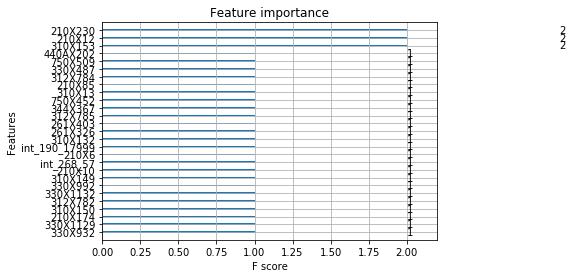

In [82]:
plot_importance(model)
plt.show()

In [159]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE, f_regression
from sklearn.ensemble import RandomForestRegressor

In [160]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RandomizedLasso, Lasso
ridge = Ridge(15)
lr = RandomizedLasso()

/home/magnusterra/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


/home/magnusterra/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.782e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 3.332e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/home/magnusterra/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.727e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 3.650e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/home/magnusterra/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 11 iterations, i.e. alpha=1.423e-03, with an active set of 11 re

10695
90


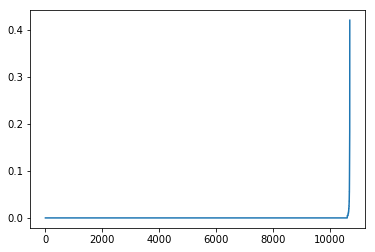

In [157]:
lr.fit(df_X[:500], train_y)
ridge_co = lr.scores_
print(len(ridge_co))
print(np.sum(ridge_co>0))
src = np.sort(ridge_co)
plt.plot(np.arange(len(src)), src)
plt.show()

In [151]:
lr = Ridge()
rfe = RFE(lr, n_features_to_select=95)
rfe.fit(df_X[:500],train_y)

RFE(estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
  n_features_to_select=95, step=1, verbose=0)

In [152]:
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), df_X.columns)))

[(1, '210X210'), (1, '210X230'), (1, '210X90'), (1, '220X116'), (1, '220X273'), (1, '220X426'), (1, '261X240'), (1, '261X251'), (1, '261X416'), (1, '261X475'), (1, '261X623'), (1, '261X698'), (1, '310X115'), (1, '310X151'), (1, '311X8'), (1, '312X117'), (1, '330X1305'), (1, '330X788'), (1, '330X829'), (1, '344X142'), (1, '344X368'), (1, '360X1021'), (1, '360X1023'), (1, '360X1336'), (1, '360X518'), (1, '400X116'), (1, '400X12'), (1, '400X138'), (1, '400X30'), (1, '420X201'), (1, '420X85'), (1, '520X182'), (1, '520X258'), (1, '520X323'), (1, '520X335'), (1, '520X355'), (1, '520X418'), (1, '520X52'), (1, '520X57'), (1, '520X73'), (1, '750X1082'), (1, '750X1087'), (1, '750X1288'), (1, '750X1332'), (1, '750X1336'), (1, '750X1341'), (1, '750X185'), (1, '750X390'), (1, '750X404'), (1, '750X446'), (1, '750X947'), (1, '750X976'), (1, 'int_137_272'), (1, 'int_143_4000'), (1, 'int_144_4000'), (1, 'int_167_476'), (1, 'int_168_136'), (1, 'int_183_1'), (1, 'int_192_12002'), (1, 'int_195_11998'), (1

In [400]:
X = df_X[:500]
Y = train_y
from sklearn.preprocessing import MinMaxScaler
from minepy import MINE

In [401]:
ranks = {}

def rank_to_dict(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x, 2), ranks)
    return dict(zip(names, ranks ))

In [402]:
df_X.shape

(721, 2989)

In [403]:
names = df_X.columns

lr = LinearRegression(normalize=True)
lr.fit(X, Y)
ranks["LR"] = rank_to_dict(np.abs(lr.coef_), names)

ridge = Ridge()
ridge.fit(X, Y)
ranks["Ridge"] = rank_to_dict(np.abs(ridge.coef_), names)


lasso = Lasso()
lasso.fit(X, Y)
ranks["Lasso"] = rank_to_dict(np.abs(lasso.coef_), names)


rlasso = RandomizedLasso()
rlasso.fit(X, Y)
ranks["Stability"] = rank_to_dict(np.abs(rlasso.scores_), names)


/home/magnusterra/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)
/home/magnusterra/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 109 iterations, i.e. alpha=5.200e-04, with an active set of 83 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/home/magnusterra/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 142 iterations, i.e. alpha=4.342e-04, with an active set of 112 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps 

In [404]:
#stop the search when 500 features are left (they will get equal scores)
rfe = RFE(lr, n_features_to_select=500)
rfe.fit(X,Y)
ranks["RFE"] = rank_to_dict(rfe.ranking_, names, order=-1)

/home/magnusterra/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [405]:

rf = RandomForestRegressor()
rf.fit(X,Y)
ranks["RF"] = rank_to_dict(rf.feature_importances_, names)


f, pval  = f_regression(X, Y, center=True)
a = f>0
b = np.zeros(len(f))
b[a] = 1
c = b==0
f[c] = 0
print(np.sum(f==0))
ranks["Corr."] = rank_to_dict(f, names)

2


/home/magnusterra/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:292: RuntimeWarning: invalid value encountered in sqrt
  n_samples * X_means ** 2)
/home/magnusterra/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/magnusterra/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/magnusterra/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/home/magnusterra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


In [406]:
vx = X.values
mine = MINE()
mic_scores = []
for i in range(X.shape[1]):
    mine.compute_score(vx[:,i], Y)
    m = mine.mic()
    mic_scores.append(m)

ranks["MIC"] = rank_to_dict(mic_scores, names)

In [407]:
r = {}
for name in names:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)

methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")

print("\t%s" % "\t".join(methods))
for name in names:
    print("%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))

	Corr.	LR	Lasso	MIC	RF	RFE	Ridge	Stability	Mean
210X1	0.39	0.0	0.0	0.57	0.02	0.4	0.09	0.0	0.18
210X2	0.13	0.0	0.0	0.73	0.04	0.34	0.13	0.0	0.17
210X3	0.29	0.0	0.0	0.4	0.0	0.2	0.01	0.0	0.11
210X4	0.11	0.0	0.0	0.64	0.0	0.97	0.52	0.0	0.28
210X5	0.43	0.0	0.0	0.8	0.0	0.55	0.01	0.0	0.22
210X7	0.02	0.0	0.0	0.58	0.0	1.0	0.35	0.0	0.24
210X8	0.1	0.0	0.0	0.46	0.0	1.0	0.39	0.0	0.24
210X10	0.18	0.0	0.0	0.52	0.0	0.95	0.43	0.0	0.26
210X11	0.24	0.0	0.0	0.84	0.06	0.26	0.06	0.0	0.18
210X12	0.04	0.0	0.0	0.79	0.13	0.68	0.27	0.0	0.24
210X13	0.0	0.0	0.0	0.43	0.0	0.98	0.13	0.0	0.19
210X14	0.0	0.0	0.0	0.51	0.0	0.37	0.02	0.0	0.11
210X15	0.01	0.0	0.0	0.38	0.0	0.24	0.02	0.0	0.08
210X18	0.14	0.0	0.0	0.49	0.0	0.7	0.13	0.0	0.18
210X20	0.07	0.0	0.0	0.52	0.0	0.48	0.06	0.0	0.14
210X23	0.05	0.0	0.0	0.52	0.0	0.56	0.22	0.0	0.17
210X24	0.0	0.0	0.0	0.8	0.0	0.79	0.08	0.0	0.21
210X25	0.02	0.0	0.0	0.62	0.0	0.03	0.0	0.0	0.08
210X26	0.01	0.0	0.0	0.58	0.0	0.21	0.02	0.0	0.1
210X27	0.0	0.0	0.0	0.48	0.0	0.2	0.01	0.0	0.09
210X28	0.34

750X635	0.03	0.0	0.0	0.61	0.0	0.99	0.09	0.0	0.22
750X636	0.19	0.0	0.0	0.58	0.01	0.84	0.2	0.0	0.23
750X644	0.19	0.0	0.0	0.63	0.0	0.68	0.15	0.0	0.21
750X652	0.18	0.0	0.0	0.69	0.05	0.78	0.13	0.0	0.23
750X659	0.1	0.0	0.0	0.57	0.0	0.97	0.22	0.0	0.23
750X660	0.0	0.0	0.0	0.57	0.0	0.66	0.1	0.0	0.17
750X668	0.0	0.0	0.0	0.55	0.0	0.54	0.08	0.0	0.15
750X676	0.02	0.0	0.0	0.52	0.0	0.25	0.02	0.0	0.1
750X691	0.01	0.0	0.0	0.6	0.0	0.26	0.05	0.0	0.12
750X697	0.0	0.0	0.0	0.54	0.0	0.8	0.45	0.0	0.22
750X702	0.01	0.0	0.0	0.64	0.0	0.5	0.1	0.0	0.16
750X705	0.07	0.0	0.0	0.52	0.0	0.27	0.09	0.0	0.12
750X712	0.06	0.0	0.0	0.48	0.0	0.8	0.0	0.0	0.17
750X713	0.03	0.0	0.0	0.57	0.0	1.0	0.34	0.0	0.24
750X741	0.43	0.0	0.0	0.64	0.01	0.54	0.1	0.09	0.23
750X742	0.05	0.0	0.0	0.69	0.0	0.47	0.09	0.0	0.16
750X745	0.02	0.0	0.0	0.58	0.0	0.16	0.04	0.0	0.1
750X763	0.11	0.0	0.0	0.51	0.13	1.0	0.52	0.0	0.28
750X764	0.19	0.0	0.0	0.73	0.0	0.75	0.15	0.0	0.23
750X775	0.18	0.0	0.0	0.66	0.0	0.45	0.06	0.0	0.17
750X778	0.19	0.0	0.0	0.64	0.0	0.

In [408]:
method_score = {}
for method in methods:
    method_score[method] = []
for name in names:
    for method in methods:
        method_score[method].append(ranks[method][name])
for method in method_score:
    method_score[method] = np.array(method_score[method])
    print(method, np.sum(method_score[method]>0))

Corr. 2335
LR 8
Lasso 0
MIC 2984
RF 424
RFE 2976
Ridge 2876
Stability 61
Mean 2989


In [409]:
print(len(rfe.ranking_))
rfe_name = names[rfe.ranking_==1]
corr_name = names[f>0]
stb_name = names[rlasso.scores_>0]
lr_name = names[lr.coef_>0]
rd_name = names[ridge.coef_>0]
print(len(lr_name))
print(len(set(rfe_name) & set(corr_name)))
print(len(set(rfe_name) & set(corr_name) & set(lr_name) & set(rd_name)))
print(len((set(rfe_name) & set(corr_name) & set(lr_name) & set(rd_name))|set(stb_name)))

2989
1508
499
245
300


In [339]:
np.sum(f>0)

9384

In [385]:
#compute the corrcoef
name_col = df_X.columns
corr_values = []
for cn in name_col:
    corr_values.append(abs(np.corrcoef(df_X[cn][:500].values, train_y)[0,1]))
corr_df = pd.DataFrame({'col':name_col,'corr_value':corr_values})
corr_df = corr_df.sort_values(by='corr_value',ascending=False)

In [386]:
print(len(name_col), np.sum(np.array(corr_values)>0))

2989 2989


In [212]:
oldnames = df_X.columns
remainnames = oldnames[np.array(corr_values)>0]
dropname = list(set(oldnames)-set(remainnames))
print(len(dropname))
print(df_X.shape)
df_X.drop(dropname, axis=1, inplace=True)
print(df_X.shape)

1305
(721, 10695)
(721, 9390)


/home/magnusterra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


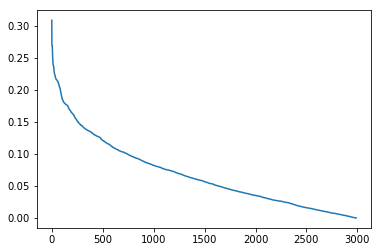

In [387]:
plt.plot(np.arange(len(corr_df)), corr_df.corr_value)
plt.show()

In [84]:
params = [1, 10, 15, 20, 25, 30, 40]
test_scores = []
for param in params:
    clf = BaggingRegressor(n_estimators=param, base_estimator=ridge)
    test_score = np.sqrt(-cross_val_score(clf, trX, tr_y, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

In [341]:
name_col = df_X.columns
corr_values = []
for cn in name_col:
    corr_values.append(abs(np.corrcoef(df_X[cn][:500].values, train_y)[0,1]))

In [345]:
len(name_col[np.array(corr_values)>0.1])

1891

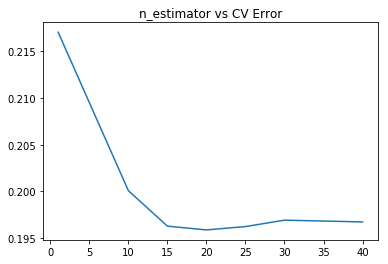

In [86]:
#import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(params, test_scores)
plt.title("n_estimator vs CV Error");

In [271]:
selected_names = list((set(rfe_name) & set(corr_name) & set(lr_name) & set(rd_name))|set(stb_name))
trainx = df_X[selected_names]

In [88]:
from xgboost import XGBRegressor

In [272]:
trX, vaX, tr_y, va_y = train_test_split(trainx[:500], train_y, test_size=0.2, random_state=100)

In [273]:
params = [1,2,3,4,5,6]
test_scores = []
for param in params:
    clf = XGBRegressor(max_depth=param)
    test_score = np.sqrt(-cross_val_score(clf, trX, tr_y, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

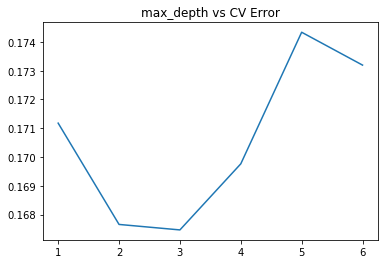

In [274]:
%matplotlib inline
plt.plot(params, test_scores)
plt.title("max_depth vs CV Error");

In [275]:
clf = XGBRegressor(max_depth=4)
clf.fit(trX, tr_y)
vap = clf.predict(vaX)
print(MSE_np(vap, va_y))

0.03144014946407972


In [384]:
clf = XGBRegressor(max_depth=3)
clf.fit(df_X[:500], train_y)
ta = clf.predict(df_X[:500])
print(MSE_np(ta, train_y))
test1_pred = clf.predict(df_X[500:600])
test1_pred = test1_pred.reshape(100)
save = pd.DataFrame({'ID':ID[500:600], 'value':test1_pred})
save.to_csv('answer.csv', index=False, header=False)

0.0039907153939776315


In [104]:
from sklearn.learning_curve import learning_curve
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import explained_variance_score

/home/magnusterra/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)
/home/magnusterra/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [106]:
tuned_parameters = [{'max_depth':[1,3,5,7,9],'n_estimators':[1,10,20,50,100]}]  
scores = ['r2']
for score in scores:
    
    print(score)
    
    clf = GridSearchCV(XGBRegressor(), tuned_parameters, cv=5, scoring=score)
    clf.fit(trX, tr_y)

    print("别！喝！咖！啡！了！最佳参数找到了亲！！：")
    print("")
    #best_estimator_ returns the best estimator chosen by the search
    print(clf.best_estimator_)
    print("")
    print("得分分别是:")
    print("")
    #grid_scores_的返回值:
    #    * a dict of parameter settings
    #    * the mean score over the cross-validation folds 
    #    * the list of scores for each fold
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() / 2, params))
    print("")


r2
别！喝！咖！啡！了！最佳参数找到了亲！！：

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:gamma', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

得分分别是:

-120.997 (+/-9.053) for {'max_depth': 1, 'n_estimators': 1, 'objective': 'reg:linear'}
-143.877 (+/-10.771) for {'max_depth': 1, 'n_estimators': 1, 'objective': 'reg:gamma'}
-18.266 (+/-1.423) for {'max_depth': 1, 'n_estimators': 10, 'objective': 'reg:linear'}
-87.276 (+/-6.529) for {'max_depth': 1, 'n_estimators': 10, 'objective': 'reg:gamma'}
-2.221 (+/-0.266) for {'max_depth': 1, 'n_estimators': 20, 'objective': 'reg:linear'}
-31.683 (+/-2.396) for {'max_depth': 1, 'n_estimators': 20, 'objective': 'reg:gamma'}
0.058 (+/-0.041) for {'max_depth': 1, 'n_estimators': 50, 'objective': 'reg:linear'}
-0.117 (+/-0.068) for {'max_depth': 

In [446]:
# multi_model task
# select the df_X that has corr>0
# use xgboost, bagging and lr
from sklearn.ensemble import BaggingRegressor  
from sklearn.tree import DecisionTreeRegressor  
def TripleModelMerge(train_data, train_label, val_data=None, val_label=None, mot=0):
    lr = LinearRegression()
    bdr = XGBRegressor()
    lr.fit(train_data, train_label)
    xgbr.fit(train_data, train_label)
    p1 = lr.predict(val_data)
    p2 = xgbr.predict(val_data)
    py = p2
    if val_label is None:
        return py
    else:
        return MSE_np(py, val_label)

In [381]:
pdall = []
psall = []
for i in range(0, 100):
    trX, vaX, tr_y, va_y = train_test_split(df_X[:500], train_y, test_size=0.2, random_state=i)
    pd = TripleModelMerge(trX, tr_y, vaX, va_y)
    trX, vaX, tr_y, va_y = train_test_split(tobeX[:500], train_y, test_size=0.2, random_state=i)
    ps = TripleModelMerge(trX, tr_y, vaX, va_y, 1)
    print(pd, ps)
    pdall.append(pd)
    psall.append(ps)
print(np.max(pdall), np.min(pdall), np.mean(pdall), np.std(pdall))
print(np.max(psall), np.min(psall), np.mean(psall), np.std(psall))

0.03977165605240167 0.043303547863757626
0.03783806397850462 0.04272456571238866
0.03692388423534926 0.048615725415346936
0.03339627272743773 0.052801192179584844


KeyboardInterrupt: 

In [457]:
from sklearn.svm import SVR
l_svr = SVR(kernel='linear')
l_svr.fit(X,Y)
print(np.sum(l_svr.coef_>0))

1523


In [461]:
lsvrcoef = l_svr.coef_.reshape(2989,)
lsvr_name = names[lsvrcoef>0]

In [462]:
tobeX = df_X[lsvr_name]
print(tobeX.shape)
test1_pred = TripleModelMerge(tobeX[:500], train_y, tobeX[500:600], None, 1)
test1_pred = test1_pred.reshape(100)
save = pd.DataFrame({'ID':ID[500:600], 'value':test1_pred})
save.to_csv('answer_xgb_svr_linear_20180101.csv', index=False, header=False)

(721, 1523)


In [383]:
import pandas as pd

In [310]:
rf_name = names[method_score['RF']>0]

18

In [358]:
means, stds = [], []
for i in range(len(names)):
    name = names[i]
    x = df_X[name]
    tmpm = np.mean(x)
    tmps = np.std(x)
    means.append(tmpm)
    stds.append(tmps)

In [359]:
print(len(means), len(set(means)), len(stds), len(set(stds)))

9390 2866 9390 1044


In [360]:
same_matrix = np.zeros((len(names), len(names)))
for i in range(len(means)):
    for j in range(i+1, len(means)):
        m1 = means[i]
        m2 = means[j]
        s1 = stds[i]
        s2 = stds[j]
        if m1 == m2:
            if s1 == s2:
                same_matrix[i,j] = 1

In [372]:
same_sets = []
repeats = set()
for i in range(len(means)):
    if np.sum(same_matrix[i])>0:
        if i in repeats:
            continue
        samel = []
        samel.append(i)
        repeats.add(i)
        for j in range(1, len(means)):
            if same_matrix[i, j] > 0:
                if j not in repeats:
                    samel.append(j)
                    repeats.add(j)
        same_sets.append(samel)
print(len(same_sets))

1076


In [373]:
for i in range(len(same_sets)):
    print(same_sets[i])

[192, 198]
[193, 199]
[211, 214, 216, 219, 239]
[279, 280]
[285, 286]
[287, 288]
[289, 290]
[291, 299]
[292, 298, 301, 303, 304]
[294, 295, 296, 297]
[302, 305]
[313, 314]
[315, 316]
[317, 318]
[320, 321]
[322, 323]
[324, 325]
[329, 330]
[354, 357]
[355, 358]
[428, 429]
[437, 438]
[453, 454]
[461, 462]
[465, 466]
[469, 470]
[486, 487]
[490, 491]
[494, 495]
[496, 497]
[503, 504]
[541, 542]
[543, 544]
[549, 550]
[553, 573]
[554, 574]
[555, 563]
[562, 567]
[692, 711]
[712, 714]
[774, 775, 902, 903]
[842, 844]
[904, 906]
[981, 989]
[992, 993, 997, 999, 1000]
[1016, 1017, 1021, 1025, 1028, 1029]
[1040, 1041]
[1123, 1886, 2241, 2242]
[1124, 1128, 1129, 2046]
[1125, 1126, 1181, 2110]
[1127, 1139, 1140, 2224]
[1130, 1135, 1136, 2199]
[1131, 1132, 1178, 2036]
[1133, 2234, 2238, 2239]
[1134, 1137, 1138, 1674]
[1141, 1711, 1805, 1806]
[1142, 1146, 1147]
[1143, 1144, 2001]
[1145, 1984, 1985]
[1148, 1979, 1980]
[1149, 1150, 1998]
[1151, 1198, 1199, 2240]
[1152, 1865, 1881, 1882]
[1153, 1770, 1877, 

In [374]:
old_dfx = copy.copy(df_X)

In [380]:
# it is the remain data that without repeat columns

In [379]:
for i in range(len(same_sets)):
    ls = same_sets[i]
    drop_name = names[ls[1:]]
    df_X.drop(drop_name, axis=1, inplace=True)
print(df_X.shape)    

(721, 2989)


In [411]:
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import r2_score
from collections import defaultdict

In [413]:
rf = RandomForestRegressor()
scores = defaultdict(list)

In [418]:
count = 0
for train_idx, test_idx in ShuffleSplit(len(X), 100, .3):
    X_train, X_test = X.values[train_idx], X.values[test_idx]
    Y_train, Y_test = Y[train_idx], Y[test_idx]
    r = rf.fit(X_train, Y_train)
    acc = r2_score(Y_test, rf.predict(X_test))
    for i in range(X.shape[1]):
        X_t = X_test.copy()
        np.random.shuffle(X_t[:, i])
        shuff_acc = r2_score(Y_test, rf.predict(X_t))
        scores[names[i]].append((acc-shuff_acc)/acc)
    print(count)
    count += 1
print("Features sorted by their score:")
print(sorted([(round(np.mean(score), 4), feat) for
              feat, score in scores.items()], reverse=True))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Features sorted by their score:
[(0.73440000000000005, '310X153'), (0.13170000000000001, '310X28'), (0.093799999999999994, '210X229'), (0.0848, '330X1129'), (0.081100000000000005, '312X785'), (0.080399999999999999, '360X185'), (0.076200000000000004, '220X389'), (0.074399999999999994, '310X152'), (0.073800000000000004, '440AX129'), (0.068500000000000005, '220X193'), (0.067100000000000007, '750X611'), (0.066400000000000001, '210X89'), (0.064699999999999994, '312X71'), (0.063399999999999998, '312X722'), (0.0613, '210X8'), (0.0557, '310X178'), (0.053900000000000003, '344X178'), (0.052600000000000001, '310X30'), (0.051799999999999999, '210X12'), (0.051299999999999998, '210X158'), (0.048300000000000003, 'in

In [422]:
mean_score = []
for feat, score in scores.items():
    print(feat, np.mean(score))
    mean_score.append(np.mean(score))

210X1 0.0171447325264
210X2 -0.00728655596977
210X3 0.000648757745942
210X4 -0.00138409286931
210X5 0.0135036669833
210X7 0.00892841523492
210X8 0.0612675771823
210X10 0.0172332092776
210X11 0.000431126638261
210X12 0.0517855524638
210X13 0.00330304662394
210X14 0.00360053702598
210X15 0.00162532694208
210X18 -0.00016071923614
210X20 0.00158108683937
210X23 0.00594844294283
210X24 0.00372911430548
210X25 0.00143463069674
210X26 0.00072523948354
210X27 0.0239055920214
210X28 -0.00573588728873
210X29 0.0
210X32 0.0135601496643
210X33 6.79032810162e-05
210X34 0.0115422040492
210X35 -0.000253104703644
210X40 0.00738280472033
210X41 -0.00135383157678
210X42 0.000383943225759
210X43 0.00212372352509
210X44 -0.00369548511751
210X46 0.0016095984827
210X47 0.000995599950964
210X48 0.0217714034321
210X50 -0.000105440791244
210X51 0.00345647344631
210X52 -0.000729296126163
210X53 -0.00131008252545
210X54 0.000474879122441
210X55 0.00959677132699
210X56 0.0040712279221
210X57 8.71713803139e-05
210

312X356 0.000659596751929
312X358 0.000550721442721
312X362 0.000195709717972
312X363 0.000673882745455
312X364 -0.000482007984667
312X373 -0.000686785442926
312X374 -0.000178376186284
312X375 -0.00109107165842
312X376 0.00169699011351
312X379 -0.00450629211947
312X381 0.000373025824598
312X382 0.000641922178977
312X385 -0.000657603165355
312X386 -0.00756827701949
312X387 0.000617929546722
312X388 -0.00216429633521
312X435 0.000225920053611
312X438 -0.0102437191691
312X439 -0.000366189560615
312X440 -0.000546207802262
312X441 -0.0130121100413
312X444 0.0232801389264
312X445 0.000351572699532
312X446 -0.000102881194431
312X447 -0.00811183537715
312X690 -0.00590666008211
312X691 -0.00304150720651
312X692 -0.0124717607448
312X693 0.0133949422377
312X711 0.00086807647441
312X712 0.00420682361152
312X713 0.0346138564416
312X716 0.0011651456066
312X717 0.00321627710476
312X718 0.00103892251409
312X719 0.0014156007651
312X722 0.0634138166517
312X724 0.000367503284964
312X725 0.0163541546714
3

440AX115 -0.00677674599009
440AX116 -0.000439567163897
440AX117 0.00373611990629
440AX118 0.000836022047949
440AX119 -0.00111757804445
440AX120 0.000748925465567
440AX121 -7.49004051561e-05
440AX122 0.00381162885744
440AX123 0.00568371126376
440AX124 0.00349623828807
440AX125 0.00334506474133
440AX126 -0.0109054411568
440AX127 -8.14827304159e-05
440AX128 0.00149712795775
440AX129 0.0737580284592
440AX130 -0.00438877491902
440AX131 -0.00543381941628
440AX132 -0.00960476722901
440AX133 0.00367651920435
440AX134 0.00809022112601
440AX135 -0.00937059186013
440AX136 -0.00504163980908
440AX137 0.00222585153647
440AX138 -0.00314190509391
440AX139 0.0105973062659
440AX140 -0.00628024316123
440AX141 0.0259229268064
440AX142 -0.0100474478796
440AX143 0.00126463189362
440AX144 -0.00160017838334
440AX146 -0.00130634434178
440AX147 -0.0240182184047
440AX148 -0.00400697246569
440AX149 0.00295061849724
440AX150 -0.00393088187085
440AX151 0.00182839750951
440AX152 0.00535037088606
440AX154 0.002169559

int_406_50 -6.8248119676e-05
int_407_12 -0.000541741461611
int_408_28 0.000529420383251
int_412_90 -0.00118267595827
int_413_0 -4.70076846147e-05
int_419_1 0.000205760407717
int_419_2 0.0142604652622
int_423_129 -0.00281873684248
int_423_130 0.000946023900739


In [423]:
mean_score = np.array(mean_score)

In [428]:
np.sum(mean_score>0.001)

872